# Supply Chain Shipment Pricing Prediction

### Project WorkFlow:
            1.Buisness Problem 
            2.Data Collection
            3.Exploratory Data Anaysis
            4.Feature Engineering
            5.Data Modelling
            6.Model Evaluation
            7.Model Deployment
                   
 

### Buisness Problem:
                The market for logistics analytics is expected to develop at a CARG of 17.3% from 2019 to 2024 ,more than doubling in size.  This   data demonstrates how logistics organisation are understanding the advantages of being able to predict what will happen in future Logistic Leaders may use the data to address supply chain difficulties,cut costs and enhance service levels all the same time.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import re
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
data=pd.read_csv('consighment_pricing.csv',index_col=False)
data.head(40)

ID Project Code            PQ #   PO / SO #  ASN/DN #        Country  \
0     1   100-CI-T01  Pre-PQ Process      SCMS-4     ASN-8  Côte d'Ivoire   
1     3   108-VN-T01  Pre-PQ Process     SCMS-13    ASN-85        Vietnam   
2     4   100-CI-T01  Pre-PQ Process     SCMS-20    ASN-14  Côte d'Ivoire   
3    15   108-VN-T01  Pre-PQ Process     SCMS-78    ASN-50        Vietnam   
4    16   108-VN-T01  Pre-PQ Process     SCMS-81    ASN-55        Vietnam   
5    23   112-NG-T01  Pre-PQ Process     SCMS-87    ASN-57        Nigeria   
6    44   110-ZM-T01  Pre-PQ Process    SCMS-139   ASN-130         Zambia   
7    45   109-TZ-T01  Pre-PQ Process    SCMS-140    ASN-94       Tanzania   
8    46   112-NG-T01  Pre-PQ Process    SCMS-156    ASN-93        Nigeria   
9    47   110-ZM-T01  Pre-PQ Process    SCMS-165   ASN-199         Zambia   
10   60   110-ZM-T01  Pre-PQ Process    SCMS-221   ASN-223         Zambia   
11   61   110-ZM-T01  Pre-PQ Process    SCMS-226   ASN-137         Zambia   
12   62   102-NG-T01  Pre-PQ Process    SCMS-230   ASN-144        Nigeria   
13   64   107-RW-T01  Pre-PQ Process    SCMS-268   ASN-242         Rwanda   
14   65   106-HT-T01  Pre-PQ Process    SCMS-274   ASN-162          Haiti   
15   68   113-ZW-T01  Pre-PQ Process    SCMS-308   ASN-285       Zimbabwe   
16   69   102-NG-T01  Pre-PQ Process    SCMS-354   ASN-608        Nigeria   
17   80   107-RW-T01  Pre-PQ Process    SCMS-488   ASN-299         Rwanda   
18   87   109-TZ-T01  Pre-PQ Process    SCMS-555   ASN-409       Tanzania   
19   92   102-NG-T01  Pre-PQ Process    SCMS-592   ASN-485        Nigeria   
20   96   102-NG-T01  Pre-PQ Process    SCMS-570   ASN-451        Nigeria   
21  108   104-CI-T01  Pre-PQ Process    SCMS-698   ASN-727  Côte d'Ivoire   
22  115   108-VN-T01  Pre-PQ Process    SCMS-753   ASN-781        Vietnam   
23  116   108-VN-T01  Pre-PQ Process    SCMS-759   ASN-632        Vietnam   
24  130   100-HT-T01  Pre-PQ Process  SCMS-10080   ASN-628          Haiti   
25  134   100-HT-T01  Pre-PQ Process  SCMS-10130   ASN-616          Haiti   
26  138   109-TZ-T01  Pre-PQ Process  SCMS-10270   ASN-710       Tanzania   
27  139   109-TZ-T01  Pre-PQ Process  SCMS-10290   ASN-788       Tanzania   
28  140   109-TZ-T01  Pre-PQ Process  SCMS-10300   ASN-856       Tanzania   
29  161   117-ET-T01  Pre-PQ Process  SCMS-11070   ASN-916       Ethiopia   
30  176   102-NG-T01  Pre-PQ Process  SCMS-11750   ASN-745        Nigeria   
31  262   116-ZA-T01  Pre-PQ Process  SCMS-14050  ASN-1251   South Africa   
32  269   108-VN-T01  Pre-PQ Process  SCMS-14190  ASN-1192        Vietnam   
33  270   108-VN-T01  Pre-PQ Process  SCMS-14200  ASN-1171        Vietnam   
34  284   107-RW-T01  Pre-PQ Process  SCMS-14630  ASN-1253         Rwanda   
35  305   123-NG-T01  Pre-PQ Process  SCMS-15550  ASN-1269        Nigeria   
36  343   116-ZA-T01  Pre-PQ Process  SCMS-16600  ASN-1520   South Africa   
37  361   125-HT-T01  Pre-PQ Process  SCMS-14080  ASN-1318          Haiti   
38  391   104-CI-T01  Pre-PQ Process  SCMS-18290  ASN-1879  Côte d'Ivoire   
39  392   104-CI-T01  Pre-PQ Process  SCMS-18310  ASN-3435  Côte d'Ivoire   

   Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0    PMO - US  Direct Drop              EXW           Air  ...   
1    PMO - US  Direct Drop              EXW           Air  ...   
2    PMO - US  Direct Drop              FCA           Air  ...   
3    PMO - US  Direct Drop              EXW           Air  ...   
4    PMO - US  Direct Drop              EXW           Air  ...   
5    PMO - US  Direct Drop              EXW           Air  ...   
6    PMO - US  Direct Drop              DDU           Air  ...   
7    PMO - US  Direct Drop              EXW           Air  ...   
8    PMO - US  Direct Drop              EXW           Air  ...   
9    PMO - US  Direct Drop              CIP           Air  ...   
10   PMO - US  Direct Drop              CIP           Air  ...   
11   PMO - US  Direct Drop              EXW           A

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 10324 non-null  object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [5]:
print("the Length of data :{}".format(len(data)))
print("the shape of data :{}".format(data.shape))

the Length of data :10324
the shape of data :(10324, 33)


In [5]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [6]:
data.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [3]:
#Renaming the columns
#data.rename(columns={ :},inplace=True)
data.rename(columns={'Freight Cost (USD)':"Freight_Cost_USD"},inplace=True)
data.rename(columns={'Vendor INCO Term':'Vendor_INCO_Term'},inplace=True)
data.rename(columns={'PQ First Sent to Client Date':'PQ_First_Sent_to_Client_Date'},inplace=True)
data.rename(columns={'PO Sent to Vendor Date':'PO_Sent_to_Vendor_Date'},inplace=True)
data.rename(columns={'Scheduled Delivery Date':'Scheduled_Delivery_Date'},inplace=True)
data.rename(columns={'Delivered to Client Date':'Delivered_to_Client_Date'},inplace=True)
data.rename(columns={'Delivery Recorded Date':'Delivery_Recorded_Date'},inplace=True)
data.rename(columns={ 'Unit of Measure (Per Pack)': 'Unit_of_Measure_Per_Pack'},inplace=True)
data.rename(columns={ 'Weight (Kilograms)':'Weight_Kilograms'},inplace=True)
data.rename(columns={'Managed By':'Managed_By'},inplace=True)
data.rename(columns={'Fulfill Via':'Fulfill_Via'},inplace=True)
data.rename(columns={'Product Group':'Product_Group'},inplace=True)
data.rename(columns={'Shipment Mode':'Shipment_Mode'},inplace=True)
data.rename(columns={'Sub Classification':'Sub_Classification'},inplace=True)
data.rename(columns={'Line Item Insurance (USD)':'Line_Item_Insurance'},inplace=True)
data.rename(columns={'Project Code':'Project_Code'},inplace=True)
data.rename(columns={'PQ #':'PQ'},inplace=True)
data.rename(columns={'PO / SO #':'PO'},inplace=True)
data.rename(columns={'ASN/DN #':'ASN'},inplace=True)
data.rename(columns={'Item Description':'Item_Description'},inplace=True)
data.rename(columns={'Dosage Form':'Dosage_Form'},inplace=True)
data.rename(columns={'Unit of Measure (Per Pack)':'Unit_of_Measure'},inplace=True)
data.rename(columns={'Line Item Quantity':'Line_Item_Quantity'},inplace=True)
data.rename(columns={'Line Item Value':'Line_Item_Value'},inplace=True)
data.rename(columns={'Pack Price':'Pack_Price'},inplace=True)
data.rename(columns={'Unit Price':'Unit_Price'},inplace=True)
data.rename(columns={'Manufacturing Site':'Manufacturing_Site'},inplace=True)
data.rename(columns={'First Line Designation':'First_Line_Designation'},inplace=True)
data.rename(columns={'Weight (Kilograms)':'Weight_Kg'},inplace=True)
data.rename(columns={'Freight Cost (USD)':'Freight_Cost_USD'},inplace=True)
data.rename(columns={'Line Item Insurance (USD)':'Line_Item_Insurance_USD'},inplace=True)
data.rename(columns={'Molecule/Test Type':'Molecule_Type'},inplace=True)
#data.rename(columns={ :},inplace=True)

## Exploratory Data Analysis

South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: Country, dtype: int64


<AxesSubplot:xlabel='Country', ylabel='count'>

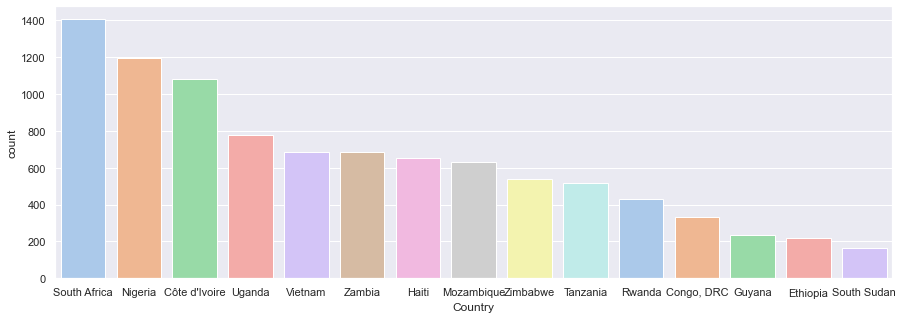

In [9]:
# Lets see which country the products have been delivered
print(data.Country.value_counts().nlargest(10))
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x=data['Country'],order=data.Country.value_counts().nlargest(15).index,palette="pastel")

#### Its clearly seen that most of the packages are delivered to South Africa

<AxesSubplot:xlabel='Managed_By', ylabel='count'>

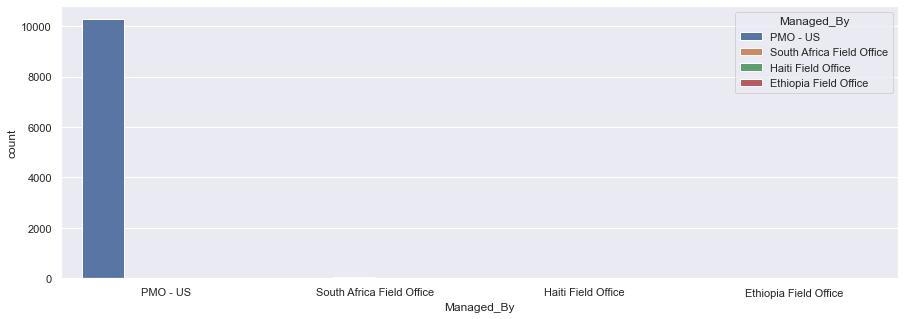

In [10]:
# Where are the most of the packages managed
sns.countplot(x=data['Managed_By'],hue=data['Managed_By'])

### Most of the Managing Offices are located in USA

RDC-Regional Delivery Center


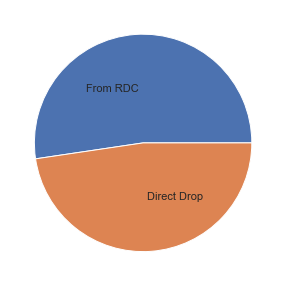

In [11]:
# In which means are the packages shipped
fulfill=data.Fulfill_Via.value_counts()
labels=(np.array(fulfill.index))
sizes=(np.array(fulfill/fulfill.sum()*100))
plt.pie(labels=labels,x=sizes,normalize=None,labeldistance=0.5)
print("RDC-Regional Delivery Center")


<AxesSubplot:xlabel='Product_Group', ylabel='count'>

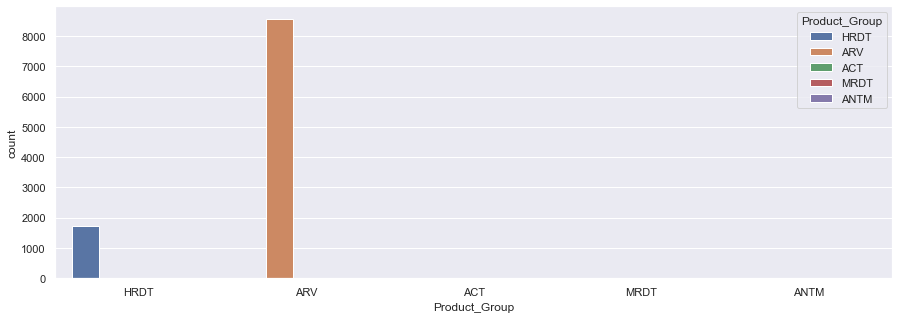

In [12]:
#Product_Group
sns.countplot(x=data.Product_Group,hue=data.Product_Group)

([<matplotlib.patches.Wedge at 0x15e5d09abe0>,
 [Text(-0.31390362539626765, 1.0542601737536517, 'Air'),
  Text(-0.1435234344984748, -1.0905966365938244, 'Truck'),
  Text(0.8805407278168501, -0.6592784136127711, 'Air Charter'),
  Text(1.0399347868393158, -0.3585186733232552, 'Ocean'),
  Text(1.0934061962729804, -0.12026175598191101, '300mg')])

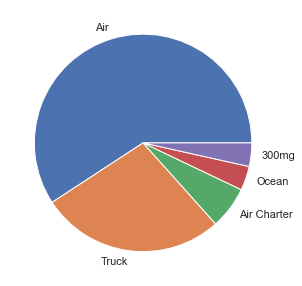

In [13]:
#Shipment Mode
shipment=data.Shipment_Mode.value_counts()
labels_shipment=(np.array(shipment.index))
sizes_shipment=(np.array(shipment/shipment.sum()*100))
plt.pie(x=sizes_shipment,labels=labels_shipment)


#### Most of the packages are being shipped by air 
#### Lets also check wheather it is shipped based on the packages weight

most of the packages are classified under Adult


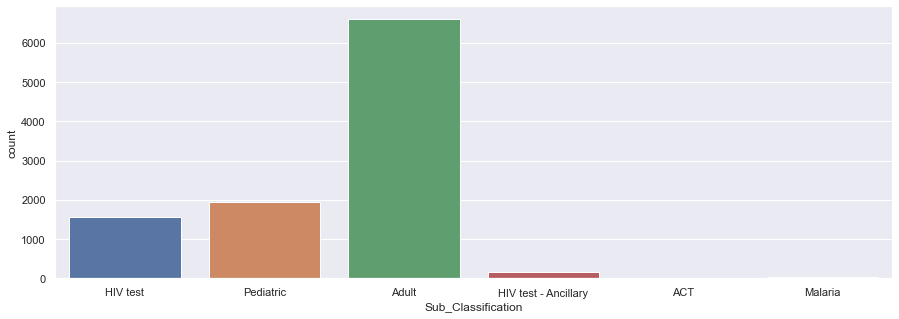

In [14]:
sns.countplot(x=data.Sub_Classification)
sns.set(rc={'figure.figsize':(10,8)})
print("most of the packages are classified under Adult")

In [5]:
#sns.pairplot(data_clean,kind='hist',dropna=True)

## Feature Engineering

In [4]:
data.isnull().sum().sort_values(ascending=False)

Line_Item_Insurance             287
Vendor                            0
Freight_Cost_USD                  0
Weight_Kilograms                  0
First_Line_Designation            0
Manufacturing_Site                0
Unit_Price                        0
Pack_Price                        0
Line_Item_Value                   0
Line_Item_Quantity                0
Unit_of_Measure_Per_Pack          0
Dosage_Form                       0
Dosage                            0
Brand                             0
Molecule_Type                     0
Item_Description                  0
ID                                0
Project_Code                      0
Product_Group                     0
Delivery_Recorded_Date            0
Delivered_to_Client_Date          0
Scheduled_Delivery_Date           0
PO_Sent_to_Vendor_Date            0
PQ_First_Sent_to_Client_Date      0
Shipment_Mode                     0
Vendor_INCO_Term                  0
Fulfill_Via                       0
Managed_By                  

In [5]:
# Checking the percentage of missing values
null_values=[feature for feature in data.columns if data[feature].isnull().sum()]
for null in null_values:
    print("{} : {}% missing values".format(null,np.round(data[null].isnull().mean(),4)*100))

Line_Item_Insurance : 2.78% missing values



###  Line time Insurance:
                 In Line item insurance the amount (pre 6/1/2009) are under analysis as they dont have price qoutes based on which the amount is qouted and cannot be
                 computed like others.  

In [6]:
#Replacing the nan values in Line_Item_Insurance using mean imputation
mean=data.Line_Item_Insurance.mean()
mean

240.11762578459653

In [7]:
data['Line_Item_Insurance']=data['Line_Item_Insurance'].replace([np.nan],mean)

In [8]:
data.head(5)

ID Project_Code              PQ       PO     ASN        Country Managed_By  \
0   1   100-CI-T01  Pre-PQ Process   SCMS-4   ASN-8  Côte d'Ivoire   PMO - US   
1   3   108-VN-T01  Pre-PQ Process  SCMS-13  ASN-85        Vietnam   PMO - US   
2   4   100-CI-T01  Pre-PQ Process  SCMS-20  ASN-14  Côte d'Ivoire   PMO - US   
3  15   108-VN-T01  Pre-PQ Process  SCMS-78  ASN-50        Vietnam   PMO - US   
4  16   108-VN-T01  Pre-PQ Process  SCMS-81  ASN-55        Vietnam   PMO - US   

   Fulfill_Via Vendor_INCO_Term Shipment_Mode  ... Unit_of_Measure_Per_Pack  \
0  Direct Drop              EXW           Air  ...                       30   
1  Direct Drop              EXW           Air  ...                      240   
2  Direct Drop              FCA           Air  ...                      100   
3  Direct Drop              EXW           Air  ...                       60   
4  Direct Drop              EXW           Air  ...                       60   

  Line_Item_Quantity Line_Item_Value Pack_Price Unit_Price  \
0                 19           551.0      29.00       0.97   
1               1000          6200.0       6.20       0.03   
2                500         40000.0      80.00       0.80   
3              31920        127360.8       3.99       0.07   
4              38000        121600.0       3.20       0.05   

              Manufacturing_Site First_Line_Designation Weight_Kilograms  \
0     Ranbaxy Fine Chemicals LTD                    Yes               13   
1      Aurobindo Unit III, India                    Yes              358   
2  ABBVIE GmbH & Co.KG Wiesbaden                    Yes              171   
3  Ranbaxy, Paonta Shahib, India                    Yes             1855   
4      Aurobindo Unit III, India                    Yes             7590   

  Freight_Cost_USD Line_Item_Insurance  
0           780.34          240.117626  
1           4521.5          240.117626  
2          1653.78          240.117626  
3         16007.06          240.117626  
4         45450.08          240.117626  

[5 rows x 33 columns]

In [9]:
#Price Qoute
#"Pre-PQ Process" indicates deliveries that occurred before the PQ process was put in place in mid-2009.
data.PQ.unique()

array(['Pre-PQ Process', 'FPQ-4587', 'FPQ-12051', ..., 'FPQ-13316',
       'FPQ-14064', 'FPQ-16523'], dtype=object)

####  Its clear that most of the deliveries are "Pre-PQ process"

In [10]:
# Product Order or Sale Order
data.PO.value_counts()

SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
               ..
SO-2676         1
SO-44992        1
SO-47051        1
SO-47640        1
SO-49072        1
Name: PO, Length: 6233, dtype: int64

In [11]:
#Advanced Shipment number
data.ASN.value_counts()

ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28034    17
             ..
ASN-5133      1
ASN-4663      1
DN-2175       1
ASN-7209      1
ASN-18531     1
Name: ASN, Length: 7030, dtype: int64

In [12]:
# Country 
data.Country.value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Lesotho                  4
Sierra Leone             4
Togo                     3
Afghanistan              3
S

In [13]:
data['Country_map']=data['Country'].map(
    {
    'South Africa':1,
    'Nigeria':2,
    "Côte d'Ivoire":3,
    'Uganda':4,
    'Vietnam':5,
    'Zambia':6,
    'Haiti':7,
    'Mozambique':8,
    'Zimbabwe':9,
    'Tanzania':10,
    'Rwanda':11,
    'Congo, DRC':12,
    'Guyana':13,
    'Ethiopia':14,
    'South Sudan':15,
    'Kenya':16,
    'Burundi':17,
    'Namibia':18,
    'Cameroon':19,
    'Botswana':20,
    'Ghana':21,
    'Dominican Republic':22,
    'Sudan':23,
    'Swaziland':24,
    'Mali':25,
    'Pakistan':26,
    'Guatemala':27,
    'Malawi':28,
    'Benin':29,
    'Libya':30,
    'Lebanon':31,
    'Angola':32,
    'Liberia':33,
    'Lesotho':34,
    'Sierra Leone':35,
    'Togo':36,
    'Afghanistan':37,
    'Senegal':38,
    'Kyrgyzstan':39,
    'Burkina Faso':40,
    'Kazakhstan':41,
    'Belize':42,
    'Guinea':43}).astype(int)

In [14]:
# Shipment Mode
# As we have an irrelavant label in our feature names "300mg" we replace ot other existing modes.
data['Shipment_Mode']=np.where(data['Shipment_Mode']=="300mg",'Air Charter',data['Shipment_Mode'])
data.Shipment_Mode.value_counts()

Air            6113
Truck          2830
Air Charter    1010
Ocean           371
Name: Shipment_Mode, dtype: int64

In [15]:
# Mapping each of the shipment mode with numerical values 
data['Shipment_Map']=data['Shipment_Mode'].map({
 'Air':1,
 'Truck':2,
 'Air Charter':3,
 'Ocean':4})

In [16]:
# Fulfill Via
# We will maps the labels into numeric
# From RDC :0 , Direct Drop:1
data['Fulfill_via_map']=data['Fulfill_Via'].map({
    'From RDC':0,
    'Direct Drop':1
}) 
data.Fulfill_via_map.value_counts()

0    5404
1    4920
Name: Fulfill_via_map, dtype: int64

In [17]:
data.PQ_First_Sent_to_Client_Date.value_counts()

Pre-PQ Process       2476
09-11-2014            205
Date Not Captured     205
07-11-2013            173
4/30/14               123
                     ... 
08-02-2011              1
7/22/13                 1
06-02-2011              1
2/24/12                 1
12-12-2011              1
Name: PQ_First_Sent_to_Client_Date, Length: 765, dtype: int64

In [22]:
# Dropping date columns with too many missing values (PQ First Sent to Client Date,PO Sent to Vendor Date)
#data=data.drop(['PQ_First_Sent_to_Client_Date','PO_Sent_to_Vendor_Date'],axis=1)

In [17]:
#Scheduled Delivery date
data['Scheduled_Delivery_date']=data.Scheduled_Delivery_Date.apply(lambda x:x[0:2])
data['Scheduled_Delivery_month']=data.Scheduled_Delivery_Date.apply(lambda x:x[3:6])
data['Scheduled_Delivery_year']=data.Scheduled_Delivery_Date.apply(lambda x:x[7:])

In [18]:
#Mapping the month as to equalent numbers
data['Scheduled_Delivery_month']=data['Scheduled_Delivery_month'].map({
'Jan':1,
'Feb':2,
'Mar':3,
'Apr':4,
'May':5,
'Jun':6,
'Jul':7,
'Aug':8,
'Sep':9,
'Oct':10,
'Nov':11,
'Dec':12}).astype(int)

In [19]:
#Delivered to client date
data.Delivered_to_Client_Date.unique()

array(['02-Jun-06', '14-Nov-06', '27-Aug-06', ..., '15-Feb-14',
       '28-May-14', '16-Apr-15'], dtype=object)

In [20]:
data['Delivered_to_client_date']=data.Delivered_to_Client_Date.apply(lambda x:x[0:2])
data['Delivered_to_client_month']=data.Delivered_to_Client_Date.apply(lambda x:x[3:6])
data['Delivered_to_client_year']=data.Delivered_to_Client_Date.apply(lambda x:x[7:])

In [21]:
#Mapping the month as to equalent numbers
data['Delivered_to_client_month']=data['Delivered_to_client_month'].map({
'Jan':1,
'Feb':2,
'Mar':3,
'Apr':4,
'May':5,
'Jun':6,
'Jul':7,
'Aug':8,
'Sep':9,
'Oct':10,
'Nov':11,
'Dec':12}).astype(int)

In [22]:
#Delivery Recorded Date
data['Delivery_Recorded_date']=data.Delivery_Recorded_Date.apply(lambda x:x[0:2])
data['Delivery_Recorded_month']=data.Delivery_Recorded_Date.apply(lambda x:x[3:6])
data['Delivery_Recorded_year']=data.Delivery_Recorded_Date.apply(lambda x:x[7:])

In [23]:
#Mapping the month as to equalent numbers
data['Delivery_Recorded_month']=data['Delivery_Recorded_month'].map({
'Jan':1,
'Feb':2,
'Mar':3,
'Apr':4,
'May':5,
'Jun':6,
'Jul':7,
'Aug':8,
'Sep':9,
'Oct':10,
'Nov':11,
'Dec':12}).astype(int)

In [24]:
#Product group
data.Product_Group.unique()

array(['HRDT', 'ARV', 'ACT', 'MRDT', 'ANTM'], dtype=object)

In [25]:
#Sub classification
data.Sub_Classification.unique()

array(['HIV test', 'Pediatric', 'Adult', 'HIV test - Ancillary', 'ACT',
       'Malaria'], dtype=object)

In [26]:
#Vendor
data.Vendor.unique()

array(['RANBAXY Fine Chemicals LTD.', 'Aurobindo Pharma Limited',
       'Abbott GmbH & Co. KG',
       'SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABORATORIES LIMITED)',
       'MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK SHARP & DOHME B.V.)',
       'ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)',
       'Trinity Biotech, Plc', 'EY Laboratories', 'CIPLA LIMITED',
       'BRISTOL-MYERS SQUIBB', 'ACCOUN NIGERIA LIMITED',
       'Premier Medical Corporation Ltd.',
       'CHEMBIO DIAGNOSTIC SYSTEMS, INC.', 'Orgenics, Ltd',
       'Orasure Technologies Inc.', 'Standard Diagnostics, Inc.',
       'JSI R&T INSTITUTE, INC.', 'GILEAD SCIENCES IRELAND, INC.',
       'BIO-RAD LABORATORIES (FRANCE)',
       'TURE PHARMACEUTICALS & MEDICAL SUPPLIES P.L.C.',
       'MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)',
       'S. BUYS WHOLESALER', 'IDA FOUNDATION', 'ZEPHYR BIOMEDICALS',
       'HETERO LABS LIMITED', 'INTERNATIONAL HEALTHCARE DISTRIBUTORS',
       'STRIDES ARCOLAB LIMITED',

In [27]:
#Item Description
data.Item_Description.unique()

array(['HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 Tests',
       'Nevirapine 10mg/ml, oral suspension, Bottle, 240 ml',
       'HIV 1/2, Determine Complete HIV Kit, 100 Tests',
       'Lamivudine 150mg, tablets, 60 Tabs',
       'Stavudine 30mg, capsules, 60 Caps',
       'Zidovudine 10mg/ml, oral solution, Bottle, 240 ml',
       'Efavirenz 200mg [Stocrin/Sustiva], capsule, 90 Caps',
       'Nevirapine 200mg, tablets, 60 Tabs',
       'Lopinavir/Ritonavir 200/50mg [Aluvia], tablets, 120 Tabs',
       'HIV 1/2, Uni-Gold HIV Kit, 20 Tests',
       'HIV 1/2, InstantChek HIV 1+2 Kit, 100 Tests',
       'Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs',
       '#102198**Didanosine 200mg [Videx], tablets, 60 Tabs',
       'HIV 1/2/O, First Response HIV 1-2.0, v.3.0 Cards Kit, 30 Tests',
       'Didanosine 2g [Videx], powder for oral solution 10mg/ml, reconstitute to 200 ml',
       'HIV 1/2, Stat-Pak HIV, Kit, 20 Tests',
       'HIV 1/2, Determine HIV Kit, without Lancets, 100 Tests',


In [28]:
#Brand
data.Brand.unique()

array(['Reveal', 'Generic', 'Determine', 'Stocrin/Sustiva', 'Aluvia',
       'Uni-Gold', 'InstantCHEK', 'Videx', 'First Response', 'Stat-Pak',
       'OraQuick', 'Bioline', 'Retrovir', 'Viread', 'Zerit', 'Capillus',
       'Genie', 'Invirase', 'Videx EC', 'Ziagen', 'Coartem', 'Viramune',
       'Paramax', 'Atripla', 'Kaletra', 'Epivir', 'Norvir', 'Truvada',
       'Clearview', 'Colloidal Gold', 'INSTi', 'Trizivir', 'Visitect',
       'Viracept', 'DoubleCheck', 'Bundi', 'ImmunoComb', 'Crixivan',
       'LAV', 'Pepti-LAV', 'Intelence', 'Prezista', 'Isentress',
       'Reyataz', 'Combivir', 'Multispot', 'CareStart', 'Hexagon'],
      dtype=object)

In [29]:
#Dosage
data.Dosage.unique()

array(['300mg', '10mg/ml', '150mg', '30mg', '200mg', '200/50mg',
       '150/300mg', '2g', '1mg/ml', '600mg', '25mg', '20mg', '250mg',
       '400mg', '20/120mg', '50+153mg', '600/200/300mg', '100mg',
       '80/20mg/ml', '600mg/2ml', '150/200/30mg', '100/25mg', '50mg',
       '15mg', '300/200mg', '150/300/200mg', '133.3/33.3mg', '80mg/ml',
       '30/6mg', '20mg/ml', '40mg', '300/150/300mg', '500/25mg',
       '30/50/6mg', '150/300+200mg', '150/30mg', '150/200/40mg',
       '30mg/ml', '200/300mg', '150/300+300mg', '300/300mg',
       '60/100/12mg', '600/300/300mg', '300/100mg', '30/60mg', '60/30mg',
       '30/50/60mg', '500mg', '125mg', '600/300mg', '60mg', '60/12mg',
       '150/300mg+600mg', '50mg/g'], dtype=object)

In [30]:
#Dosage Form
data.Dosage_Form.unique()

array(['Test kit', 'Oral suspension', 'Tablet', 'Capsule',
       'Oral solution', 'Tablet - FDC', 'Powder for oral solution',
       'Test kit - Ancillary', 'Chewable/dispersible tablet',
       'Delayed-release capsules - blister', 'Tablet - blister',
       'Tablet - FDC + blister', 'Tablet - FDC + co-blister', 'Injection',
       'Delayed-release capsules', 'Chewable/dispersible tablet - FDC',
       'Oral powder'], dtype=object)

In [31]:
#Manufacturing site
data.Manufacturing_Site.unique()

array(['Ranbaxy Fine Chemicals LTD', 'Aurobindo Unit III, India',
       'ABBVIE GmbH & Co.KG Wiesbaden', 'Ranbaxy, Paonta Shahib, India',
       'MSD South Granville Australia', "ABBVIE (Abbott) St. P'burg USA",
       'ABBVIE Ludwigshafen Germany', 'Trinity Biotech, Plc',
       'EY Laboratories, USA', 'Cipla, Goa, India', 'BMS Meymac, France',
       'Premier Med. Corp Ltd. India', 'Chembio Diagnostics Sys. Inc.',
       'Inverness Japan', 'Pacific Biotech, Thailand',
       'Standard Diagnostics, Korea', 'GSK Mississauga (Canada)',
       'Gilead(Nycomed) Oranienburg DE', 'Bio-Rad Laboratories',
       'Mylan (formerly Matrix) Nashik', 'Roche Basel', 'GSK Ware (UK)',
       'Novartis Pharma AG, Switzerland', 'BI, Ingelheim, Germany',
       'Not Applicable', 'Ipca Dadra/Nagar Haveli IN', 'MSD, Haarlem, NL',
       'Aspen-OSD, Port Elizabeth, SA', 'ABBVIE (Abbott) Logis. UK',
       'Gland Pharma Ltd Pally Factory', 'GSK Aranda',
       'Hetero Unit III Hyderabad IN', 'ABBVIE (Abbot

In [32]:
#First Line Designation
data.First_Line_Designation.unique()
data['First_Line_Designation_map']=data['First_Line_Designation'].map({
    'Yes':1,
    'No':0
})

In [33]:
# Filling the exact values with for the missing values of freight_cost_usd and Weight_Kilograms
regex = {
    "id_number": ":\d*"
}
def change_to_number(freight_cost_usd):
    match = re.search(regex['id_number'], freight_cost_usd, re.IGNORECASE)
    if match:
        id = match.group(0).replace(':','')
        filtered = data.query("ID==" +id)
        return filtered['Freight_Cost_USD'].item()
    else:
        return freight_cost_usd
    
def convert_to_number(weight):
    match = re.search(regex['id_number'], weight, re.IGNORECASE)
    if match:
        id = match.group(0).replace(':','')
        filtered = data.query("ID == "+id)
        return filtered['Weight_Kilograms'].item()
    else:
        return weight
data['Freight_Cost_USD_Clean'] = data['Freight_Cost_USD'].apply(change_to_number)
data['Weight_Kilograms_Clean'] = data['Weight_Kilograms'].apply(convert_to_number)

In [34]:
# Removing the missing rows from the features
freight_cost_indexes=data.index[(data['Freight_Cost_USD_Clean']=='Freight Included in Commodity Cost')| (data['Freight_Cost_USD_Clean']=='Invoiced Separately')].tolist()

In [35]:
weight_indexes=data.index[(data['Weight_Kilograms_Clean']=='Weight Captured Separately')].tolist()

In [36]:
indexed=list(set(freight_cost_indexes+weight_indexes))

In [37]:
data_clean=data.drop(indexed)

In [38]:
# changing datatype of columns
data_clean['Freight_Cost_USD_Clean']=pd.to_numeric(data_clean['Freight_Cost_USD_Clean'])
data_clean['Weight_Kilograms_Clean']=pd.to_numeric(data_clean['Weight_Kilograms_Clean'])
data_clean.dtypes

ID                                int64
Project_Code                     object
PQ                               object
PO                               object
ASN                              object
Country                          object
Managed_By                       object
Fulfill_Via                      object
Vendor_INCO_Term                 object
Shipment_Mode                    object
PQ_First_Sent_to_Client_Date     object
PO_Sent_to_Vendor_Date           object
Scheduled_Delivery_Date          object
Delivered_to_Client_Date         object
Delivery_Recorded_Date           object
Product_Group                    object
Sub_Classification               object
Vendor                           object
Item_Description                 object
Molecule_Type                    object
Brand                            object
Dosage                           object
Dosage_Form                      object
Unit_of_Measure_Per_Pack          int64
Line_Item_Quantity                int64


In [39]:
#dropping of unwanted columns
data_clean=data_clean.drop(['Shipment_Mode','PQ_First_Sent_to_Client_Date','PO_Sent_to_Vendor_Date','Weight_Kilograms','Freight_Cost_USD','Country','Scheduled_Delivery_Date','Delivery_Recorded_Date','First_Line_Designation',
'Fulfill_Via','Delivered_to_Client_Date'],axis=1)

In [36]:
data_clean.columns

Index(['ID', 'Project_Code', 'PQ', 'PO', 'ASN', 'Managed_By',
       'Vendor_INCO_Term', 'Product_Group', 'Sub_Classification', 'Vendor',
       'Item_Description', 'Molecule_Type', 'Brand', 'Dosage', 'Dosage_Form',
       'Unit_of_Measure_Per_Pack', 'Line_Item_Quantity', 'Line_Item_Value',
       'Pack_Price', 'Unit_Price', 'Manufacturing_Site', 'Line_Item_Insurance',
       'Country_map', 'Shipment_Map', 'Fulfill_via_map',
       'Scheduled_Delivery_date', 'Scheduled_Delivery_month',
       'Scheduled_Delivery_year', 'Delivered_to_client_date',
       'Delivered_to_client_month', 'Delivered_to_client_year',
       'Delivery_Recorded_date', 'Delivery_Recorded_month',
       'Delivery_Recorded_year', 'First_Line_Designation_map',
       'Freight_Cost_USD_Clean', 'Weight_Kilograms_Clean'],
      dtype='object')

In [40]:
# Managed By
data_clean.Managed_By.unique()


array(['PMO - US', 'Haiti Field Office'], dtype=object)

In [41]:
data_clean['Managed_By']=data_clean['Managed_By'].map({
    'PMO - US':1,
    'Haiti Field Office':2
})

In [42]:
data_clean.columns

Index(['ID', 'Project_Code', 'PQ', 'PO', 'ASN', 'Managed_By',
       'Vendor_INCO_Term', 'Product_Group', 'Sub_Classification', 'Vendor',
       'Item_Description', 'Molecule_Type', 'Brand', 'Dosage', 'Dosage_Form',
       'Unit_of_Measure_Per_Pack', 'Line_Item_Quantity', 'Line_Item_Value',
       'Pack_Price', 'Unit_Price', 'Manufacturing_Site', 'Line_Item_Insurance',
       'Country_map', 'Shipment_Map', 'Fulfill_via_map',
       'Scheduled_Delivery_date', 'Scheduled_Delivery_month',
       'Scheduled_Delivery_year', 'Delivered_to_client_date',
       'Delivered_to_client_month', 'Delivered_to_client_year',
       'Delivery_Recorded_date', 'Delivery_Recorded_month',
       'Delivery_Recorded_year', 'First_Line_Designation_map',
       'Freight_Cost_USD_Clean', 'Weight_Kilograms_Clean'],
      dtype='object')

### Data analysis of numerical features

In [39]:
continous_val_features=['Freight_Cost_USD_Clean','Weight_Kilograms_Clean']

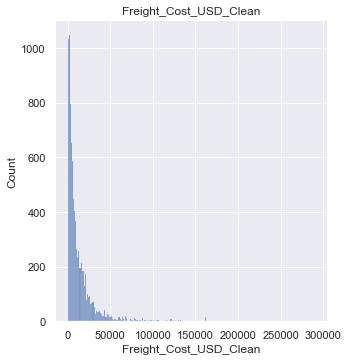

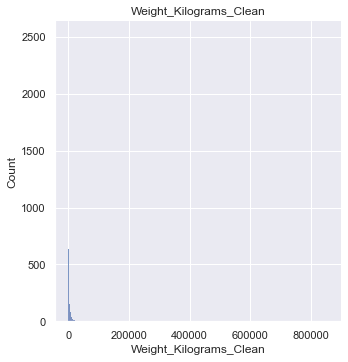

In [49]:
continous_val_features=['Freight_Cost_USD_Clean','Weight_Kilograms_Clean']
for feature in continous_val_features:
  copy_data=data_clean.copy()
  sns.displot(data=copy_data,x=copy_data[feature],kind='hist').set(title=feature)


###### It is positively skewed so we have to apply lograthimic transformation at the end

In [60]:
#Outlier check

##### We have some alpha-numeric values in some features for which we couldnt use boxplot so we perform outlier check for other features.

In [43]:
numerical_features=['Unit_of_Measure_Per_Pack','Line_Item_Quantity','Weight_Kilograms_Clean','Line_Item_Value','Pack_Price','Unit_Price','Line_Item_Insurance','Freight_Cost_USD_Clean']
#'Line_Item_Value','Pack_Price','Unit_Price','Line_Item_Insurance','Freight_Cost_USD_Clean'

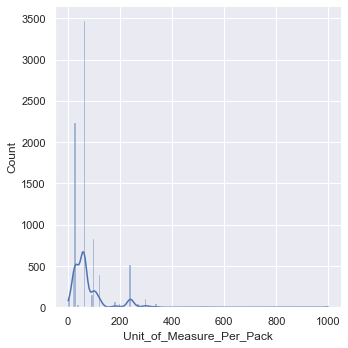

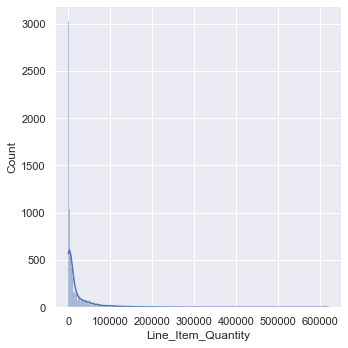

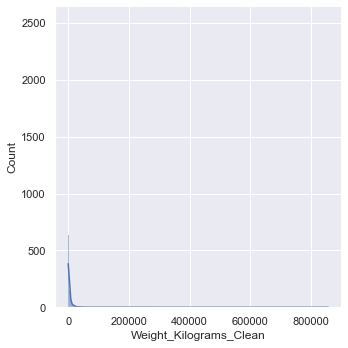

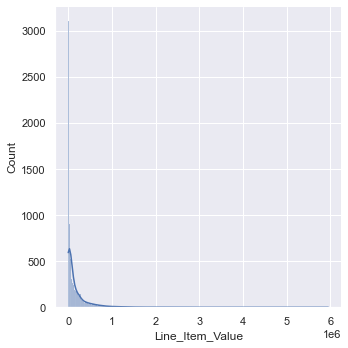

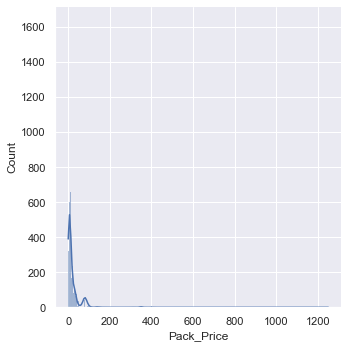

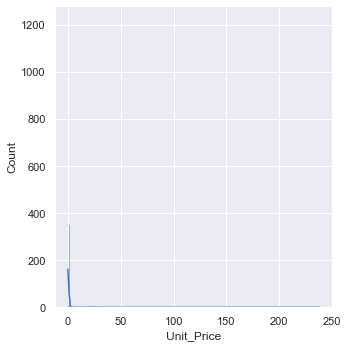

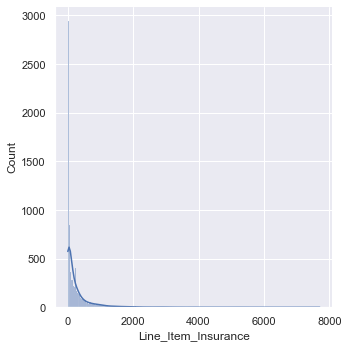

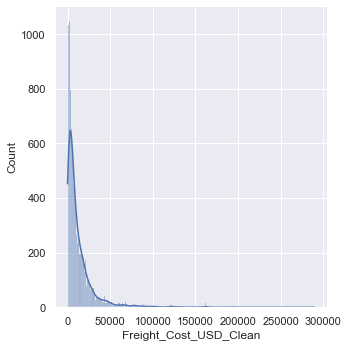

In [44]:
# Distribution of data
for features in numerical_features:
  cop=data_clean.copy()
  sns.displot(x=cop[features],data=cop,kind='hist',kde=True)
  plt.show()

All the numeric columns are positvely skewed

## Boxplot Before treating Outliers

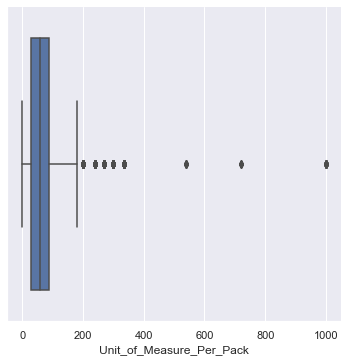

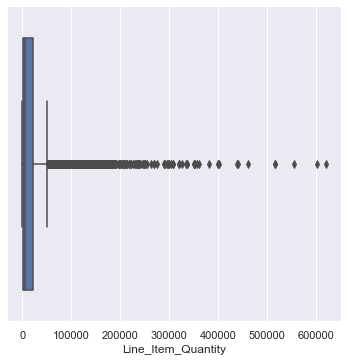

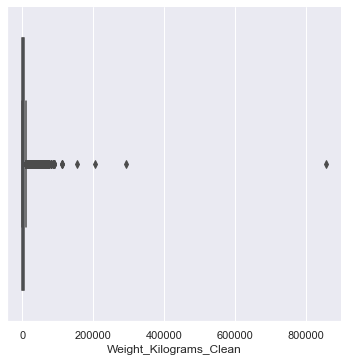

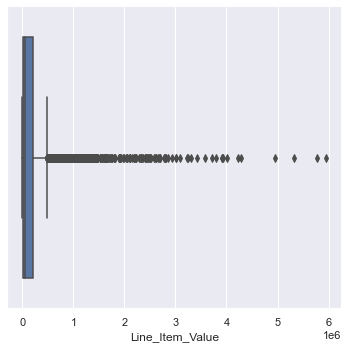

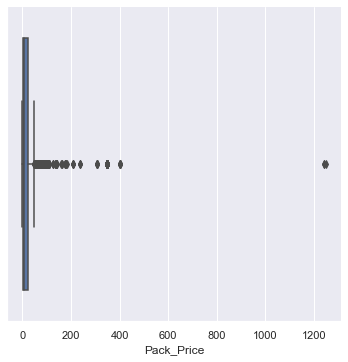

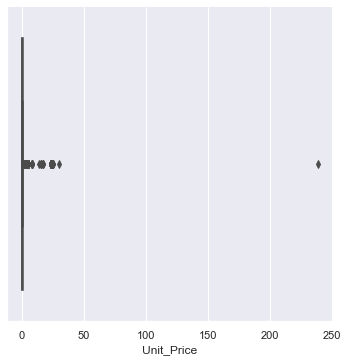

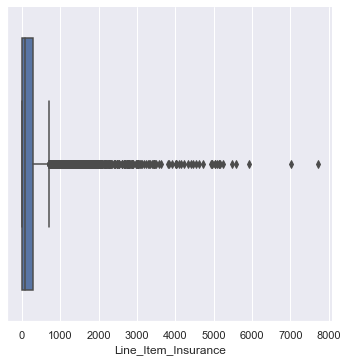

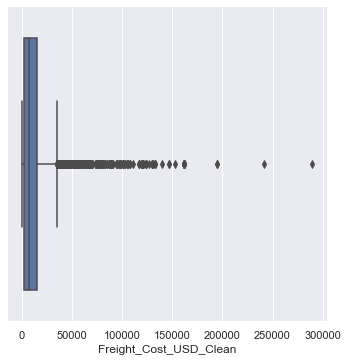

In [53]:
for features in numerical_features:
  cop=data_clean.copy()
  sns.catplot(x=cop[features],data=cop,kind='box')
plt.show()

####  Handling Zero values

In [43]:
def drop_zero(data_clean,oulier_data):
    for i in data_clean:
        data_clean[oulier_data]=data_clean[oulier_data].replace(0.0,data_clean[oulier_data].mean())
oulier_data=['Unit_of_Measure_Per_Pack','Line_Item_Quantity','Weight_Kilograms_Clean','Line_Item_Value','Pack_Price','Unit_Price','Line_Item_Insurance','Freight_Cost_USD_Clean']        
 

In [44]:
drop_zero(data_clean,oulier_data)    

###  Lets seperate the outliers columns from the data

In [45]:
#Detecting Outliers
def detect_outlier(data_clean,oulier_data):
     for features in data_clean:
        #numerical_features=sorted(data)
        q1=data_clean[oulier_data].quantile(0.25)
        q3=data_clean[oulier_data].quantile(0.75)
        #lowerbound,upperbound=np.percentile(features[oulier_data],[25,75])
        iqr=q3-q1
        lowerbound=q1-(1.5*iqr)
        upperbound=q3+(1.5*iqr)
        data_clean[oulier_data]=np.where(data_clean[oulier_data]<lowerbound,lowerbound,np.where(data_clean[oulier_data]>upperbound,upperbound,data_clean[oulier_data]))
         #detected_outliers=data_clean.loc[np.where((data_clean[oulier_data]>upperbound) | (data_clean[oulier_data]<lowerbound))]
oulier_data=['Unit_of_Measure_Per_Pack','Line_Item_Quantity','Weight_Kilograms_Clean','Line_Item_Value','Pack_Price','Unit_Price','Line_Item_Insurance','Freight_Cost_USD_Clean']

In [46]:
detect_outlier(data_clean,oulier_data)

In [47]:
null_features=['Line_Item_Value','Pack_Price','Unit_Price','Line_Item_Insurance','Weight_Kilograms_Clean']

In [48]:
for i in null_features:
    data_clean[null_features]=data_clean[null_features].fillna(data_clean[null_features].mean())
data_clean.isnull().sum()
   

ID                            0
Project_Code                  0
PQ                            0
PO                            0
ASN                           0
Managed_By                    0
Vendor_INCO_Term              0
Product_Group                 0
Sub_Classification            0
Vendor                        0
Item_Description              0
Molecule_Type                 0
Brand                         0
Dosage                        0
Dosage_Form                   0
Unit_of_Measure_Per_Pack      0
Line_Item_Quantity            0
Line_Item_Value               0
Pack_Price                    0
Unit_Price                    0
Manufacturing_Site            0
Line_Item_Insurance           0
Country_map                   0
Shipment_Map                  0
Fulfill_via_map               0
Scheduled_Delivery_date       0
Scheduled_Delivery_month      0
Scheduled_Delivery_year       0
Delivered_to_client_date      0
Delivered_to_client_month     0
Delivered_to_client_year      0
Delivery

We have handled the ouliers by inter quantile range method(iqr) but still there are some features whose values are 0 now lets handle them.

Lets check the if there is any outliers in the data after applying transformation

{'whiskers': [<matplotlib.lines.Line2D at 0x20caed379d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20caed290d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20caed37670>],
 'medians': [<matplotlib.lines.Line2D at 0x20caed29790>],
 'fliers': [<matplotlib.lines.Line2D at 0x20caed29af0>],
 'means': []}

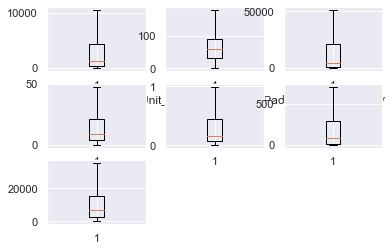

In [47]:
plt.subplot(331)
plt.boxplot(x=data_clean['Weight_Kilograms_Clean'])
plt.xlabel('Weight kilograms')
plt.subplot(332)
plt.boxplot(x=data_clean['Unit_of_Measure_Per_Pack'])
plt.xlabel('Unit_of_Measure_Per_Pack')
plt.subplot(333)
plt.boxplot(x=data_clean['Line_Item_Quantity'])
plt.xlabel('Line_Item_Quantity')
plt.subplot(334)
plt.boxplot(x=data_clean['Pack_Price'])
plt.xlabel('Pack_Price')
plt.subplot(335)
plt.boxplot(x=data_clean['Unit_Price'])
plt.subplot(336)
plt.boxplot(x=data_clean['Line_Item_Insurance'])
plt.subplot(337)
plt.boxplot(x=data_clean['Freight_Cost_USD_Clean'])

Its clearly seen that the data has no outliers now but still some features are skewed lets treat them by using Log Transformation

There are some 0 values so we will try to replace them

Log Transformation

In [46]:
a=np.log(data_clean.Freight_Cost_USD_Clean)

<AxesSubplot:xlabel='Freight_Cost_USD_Clean', ylabel='Count'>

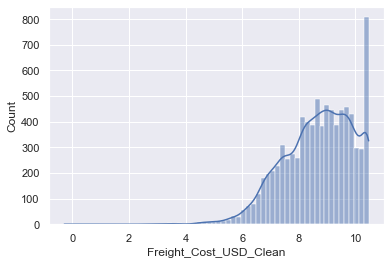

In [55]:
sns.histplot(x=a,kde=True)

 Square-root transformation

In [56]:
b=np.sqrt(data_clean.Freight_Cost_USD_Clean)

<AxesSubplot:xlabel='Freight_Cost_USD_Clean', ylabel='Count'>

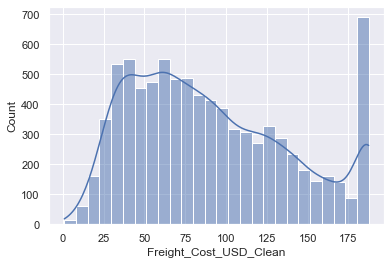

In [57]:
sns.histplot(x=b,kde=True)

Box-Cox Transformation

<AxesSubplot:ylabel='Count'>

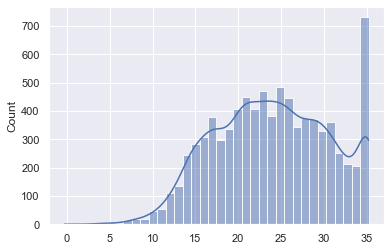

In [58]:
from scipy import stats
c=stats.boxcox(data_clean['Freight_Cost_USD_Clean'])[0]
sns.histplot(x=c,kde=True)

The above transformation clearly shows that our targer variable performs well in "Square-root transformation"

In [49]:
# Label encoding for some features 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [50]:
object_data=data_clean[['Vendor_INCO_Term','Product_Group','Sub_Classification','Vendor','Item_Description'
,'Molecule_Type','Brand','Dosage','Dosage_Form','Manufacturing_Site']]

In [51]:
object_data_dummy=object_data.apply(encoder.fit_transform)

In [52]:
object_data_dummy

Vendor_INCO_Term  Product_Group  Sub_Classification  Vendor  \
0                     6              3                   2      41   
1                     6              2                   5       8   
2                     7              3                   2       7   
3                     6              2                   1      45   
4                     6              2                   1       8   
...                 ...            ...                 ...     ...   
10316                 0              2                   1      42   
10317                 0              2                   1      42   
10318                 0              2                   5      42   
10319                 0              2                   5      42   
10320                 0              2                   1      42   

       Item_Description  Molecule_Type  Brand  Dosage  Dosage_Form  \
0                    92             53     30      33           15   
1                   130             72     12       2            8   
2                    66             26      9      33           15   
3                    96             55     12      13           10   
4                   150             80     12      34            0   
...                 ...            ...    ...     ...          ...   
10316               109             60     12      10           11   
10317                53             12     12      49           10   
10318               103             57     12      25            2   
10319               103             57     12      25            2   
10320               109             60     12      10           11   

       Manufacturing_Site  
0                      64  
1                       8  
2                       3  
3                      67  
4                       8  
...                   ...  
10316                   8  
10317                  72  
10318                  16  
10319                  54  
10320                  29  

[8493 rows x 10 columns]

Now we have encoded the features in numerical which would be feasible for training data.

We have to drop the encoded features from main data and combine it with object dummy

In [53]:
data_clean=data_clean.drop(['Vendor_INCO_Term','Product_Group','Sub_Classification','Vendor','Item_Description'
,'Molecule_Type','Brand','Dosage','Dosage_Form','Manufacturing_Site'],axis=1)

In [54]:
#Applying log as data is skewed.
data_clean['Freight_Cost_USD_Clean']=np.log(data_clean['Freight_Cost_USD_Clean'])

In [55]:
#Combining the data and object_dummy
combineddata=pd.concat([data_clean,object_data_dummy],axis=1)

In [56]:
combineddata

ID Project_Code              PQ        PO      ASN  Managed_By  \
0          1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8           1   
1          3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85           1   
2          4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14           1   
3         15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50           1   
4         16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55           1   
...      ...          ...             ...       ...      ...         ...   
10316  86815   151-NG-T30       FPQ-16313  SO-51420  DN-4279           1   
10317  86816   151-NG-T30       FPQ-16313  SO-51440  DN-4282           1   
10318  86817   103-ZW-T30       FPQ-15197  SO-50020  DN-4307           1   
10319  86818   103-ZW-T30       FPQ-15197  SO-50020  DN-4307           1   
10320  86819   104-CI-T30       FPQ-15259  SO-50102  DN-4313           1   

       Unit_of_Measure_Per_Pack  Line_Item_Quantity  Line_Item_Value  \
0                          30.0                19.0           551.00   
1                         180.0              1000.0          6200.00   
2                         100.0               500.0         40000.00   
3                          60.0             31920.0        127360.80   
4                          60.0             38000.0        121600.00   
...                         ...                 ...              ...   
10316                      60.0             15000.0         97800.00   
10317                      30.0              6724.0         20978.88   
10318                      60.0             51240.0        488012.00   
10319                      60.0             51240.0        488012.00   
10320                      60.0             21072.0        137389.44   

       Pack_Price  ...  Vendor_INCO_Term  Product_Group  Sub_Classification  \
0          29.000  ...                 6              3                   2   
1           6.200  ...                 6              2                   5   
2          47.835  ...                 7              3                   2   
3           3.990  ...                 6              2                   1   
4           3.200  ...                 6              2                   1   
...           ...  ...               ...            ...                 ...   
10316       6.520  ...                 0              2                   1   
10317       3.120  ...                 0              2                   1   
10318       3.600  ...                 0              2                   5   
10319       3.600  ...                 0              2                   5   
10320       6.520  ...                 0              2                   1   

       Vendor  Item_Description Molecule_Type  Brand Dosage Dosage_Form  \
0          41                92            53     30     33          15   
1           8               130            72     12      2           8   
2           7                66            26      9     33          15   
3          45                96            55     12     13          10   
4           8               150            80     12     34           0   
...       ...               ...           ...    ...    ...         ...   
10316      42               109            60     12     10          11   
10317      42                53            12     12     49          10   
10318      42               103            57     12     25           2   
10319      42               103            57     12     25           2   
10320      42               109            60     12     10          11   

       Manufacturing_Site  
0                      64  
1                       8  
2                       3  
3                      67  
4                       8  
...                   ...  
10316                   8  
10317                  72  
10318                  16  
10319                  54  
10320                  29  

[8493 rows x 37 columns]

Lets remove the 'Pre-PQ Process' value from the PQ feature as the values arent available

In [57]:
pq_index=combineddata.index[(combineddata['PQ']=='Pre-PQ Process')].tolist()

In [58]:
index=list(set(pq_index))

In [59]:
combineddata_final=combineddata.drop(index)

In [60]:
combineddata_final

ID Project_Code         PQ           PO        ASN  Managed_By  \
2681   12929   102-KE-T30   FPQ-4587   SCMS-58380   ASN-5901           1   
2682   12935   108-VN-T30  FPQ-12051  SCMS-188650  ASN-23215           1   
2683   12959   110-ZM-T30  FPQ-14827  SCMS-256500  ASN-31164           1   
2684   12973   106-HT-T30   FPQ-9066  SCMS-138620  ASN-14950           1   
2685   12981   105-SS-T30  FPQ-11754  SCMS-181400  ASN-19428           1   
...      ...          ...        ...          ...        ...         ...   
10316  86815   151-NG-T30  FPQ-16313     SO-51420    DN-4279           1   
10317  86816   151-NG-T30  FPQ-16313     SO-51440    DN-4282           1   
10318  86817   103-ZW-T30  FPQ-15197     SO-50020    DN-4307           1   
10319  86818   103-ZW-T30  FPQ-15197     SO-50020    DN-4307           1   
10320  86819   104-CI-T30  FPQ-15259     SO-50102    DN-4313           1   

       Unit_of_Measure_Per_Pack  Line_Item_Quantity  Line_Item_Value  \
2681                      100.0                 1.0            80.00   
2682                       60.0             11092.0         74871.00   
2683                      100.0              6280.0        488012.00   
2684                       60.0               298.0           685.40   
2685                      100.0                90.0          8010.00   
...                         ...                 ...              ...   
10316                      60.0             15000.0         97800.00   
10317                      30.0              6724.0         20978.88   
10318                      60.0             51240.0        488012.00   
10319                      60.0             51240.0        488012.00   
10320                      60.0             21072.0        137389.44   

       Pack_Price  ...  Vendor_INCO_Term  Product_Group  Sub_Classification  \
2681       47.835  ...                 6              3                   2   
2682        6.750  ...                 6              2                   1   
2683       47.835  ...                 6              3                   2   
2684        2.300  ...                 6              2                   5   
2685       47.835  ...                 6              3                   2   
...           ...  ...               ...            ...                 ...   
10316       6.520  ...                 0              2                   1   
10317       3.120  ...                 0              2                   1   
10318       3.600  ...                 0              2                   5   
10319       3.600  ...                 0              2                   5   
10320       6.520  ...                 0              2                   1   

       Vendor  Item_Description Molecule_Type  Brand Dosage Dosage_Form  \
2681       38                66            26      9     33          15   
2682       34               109            60     12     10          11   
2683       38                66            26      9     33          15   
2684       14                99            56     12     26           2   
2685       38                66            26      9     33          15   
...       ...               ...           ...    ...    ...         ...   
10316      42               109            60     12     10          11   
10317      42                53            12     12     49          10   
10318      42               103            57     12     25           2   
10319      42               103            57     12     25           2   
10320      42               109            60     12     10          11   

       Manufacturing_Site  
2681                   34  
2682                   53  
2683                    6  
2684                   16  
2685                    6  
...                   ...  
10316                   8  
10317                  72  
10318                  16  
10319                  54  
10320                  29  

[6310 rows x 37 columns]

In [61]:
combineddata_final.columns

Index(['ID', 'Project_Code', 'PQ', 'PO', 'ASN', 'Managed_By',
       'Unit_of_Measure_Per_Pack', 'Line_Item_Quantity', 'Line_Item_Value',
       'Pack_Price', 'Unit_Price', 'Line_Item_Insurance', 'Country_map',
       'Shipment_Map', 'Fulfill_via_map', 'Scheduled_Delivery_date',
       'Scheduled_Delivery_month', 'Scheduled_Delivery_year',
       'Delivered_to_client_date', 'Delivered_to_client_month',
       'Delivered_to_client_year', 'Delivery_Recorded_date',
       'Delivery_Recorded_month', 'Delivery_Recorded_year',
       'First_Line_Designation_map', 'Freight_Cost_USD_Clean',
       'Weight_Kilograms_Clean', 'Vendor_INCO_Term', 'Product_Group',
       'Sub_Classification', 'Vendor', 'Item_Description', 'Molecule_Type',
       'Brand', 'Dosage', 'Dosage_Form', 'Manufacturing_Site'],
      dtype='object')

In [67]:
# We are making a copy of our data set so that we  can drop id columns.

In [62]:
combineddata_final_copy=combineddata_final.copy()

In [63]:
# Lets drop ID and other order number related features as they dont add value to data.
combineddata_final=combineddata_final.drop(['ID','Project_Code','PQ','PO','ASN','Line_Item_Quantity'],axis=1)

####  Splitting Of Data

In [64]:
X=combineddata_final.drop(['Freight_Cost_USD_Clean'],axis=1)
y=combineddata_final['Freight_Cost_USD_Clean']

In [65]:
y=y.astype('int')

###### Feature Selection

Finding the best most important features

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [67]:
ordered_ranked_features=SelectKBest(score_func=chi2,k=30)
ordered_features=ordered_ranked_features.fit(X,y)

In [68]:
df_scores=pd.DataFrame(ordered_features.scores_,columns=['Score'])
df_columns=pd.DataFrame(X.columns)


In [69]:
features_rank=pd.concat([df_columns,df_scores],axis=1)
features_rank.columns=['Features','Score']
features_rank

Features         Score
0                   Managed_By  3.985613e-04
1     Unit_of_Measure_Per_Pack  5.591696e+02
2              Line_Item_Value  3.487816e+08
3                   Pack_Price  2.651173e+03
4                   Unit_Price  5.893925e+01
5          Line_Item_Insurance  4.694074e+05
6                  Country_map  1.149853e+03
7                 Shipment_Map  1.912613e+02
8              Fulfill_via_map  1.114510e+02
9      Scheduled_Delivery_date  1.532881e+02
10    Scheduled_Delivery_month  3.134189e+01
11     Scheduled_Delivery_year  3.406282e+01
12    Delivered_to_client_date  7.214526e+01
13   Delivered_to_client_month  4.004158e+01
14    Delivered_to_client_year  3.388890e+01
15      Delivery_Recorded_date  6.064426e+01
16     Delivery_Recorded_month  4.496783e+01
17      Delivery_Recorded_year  3.409134e+01
18  First_Line_Designation_map  4.592473e+01
19      Weight_Kilograms_Clean  9.105124e+06
20            Vendor_INCO_Term  5.811102e+02
21               Product_Group  8.110228e+00
22          Sub_Classification  2.951409e+02
23                      Vendor  1.285243e+03
24            Item_Description  7.446854e+02
25               Molecule_Type  5.522320e+02
26                       Brand  1.318634e+03
27                      Dosage  1.978833e+02
28                 Dosage_Form  2.723900e+02
29          Manufacturing_Site  1.530295e+02

In [169]:
features_rank.nlargest(35,'Score')

Features         Score
2              Line_Item_Value  3.487816e+08
19      Weight_Kilograms_Clean  9.105124e+06
5          Line_Item_Insurance  4.694074e+05
3                   Pack_Price  2.651173e+03
26                       Brand  1.318634e+03
23                      Vendor  1.285243e+03
6                  Country_map  1.149853e+03
24            Item_Description  7.446854e+02
20            Vendor_INCO_Term  5.811102e+02
1     Unit_of_Measure_Per_Pack  5.591696e+02
25               Molecule_Type  5.522320e+02
22          Sub_Classification  2.951409e+02
28                 Dosage_Form  2.723900e+02
27                      Dosage  1.978833e+02
7                 Shipment_Map  1.912613e+02
9      Scheduled_Delivery_date  1.532881e+02
29          Manufacturing_Site  1.530295e+02
8              Fulfill_via_map  1.114510e+02
12    Delivered_to_client_date  7.214526e+01
15      Delivery_Recorded_date  6.064426e+01
4                   Unit_Price  5.893925e+01
18  First_Line_Designation_map  4.592473e+01
16     Delivery_Recorded_month  4.496783e+01
13   Delivered_to_client_month  4.004158e+01
17      Delivery_Recorded_year  3.409134e+01
11     Scheduled_Delivery_year  3.406282e+01
14    Delivered_to_client_year  3.388890e+01
10    Scheduled_Delivery_month  3.134189e+01
21               Product_Group  8.110228e+00
0                   Managed_By  3.985613e-04

 Using the ensemble method we will find the method for best score of the features

In [70]:
from sklearn.ensemble  import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [71]:
print(model.feature_importances_)

[2.61178433e-05 1.72300591e-02 7.14041111e-02 3.20126390e-02
 3.06182700e-02 7.59979559e-02 5.54699576e-02 3.21269243e-02
 8.30829623e-03 4.49008637e-02 4.26813977e-02 3.30536583e-02
 4.39565336e-02 4.43402820e-02 3.32851913e-02 4.40508331e-02
 4.39548440e-02 3.27021328e-02 1.55908235e-02 1.28212062e-01
 1.48385172e-02 5.09801169e-03 1.10583716e-02 1.64358822e-02
 2.42145848e-02 2.33611740e-02 9.82323911e-03 2.02809038e-02
 1.93928271e-02 2.55735350e-02]


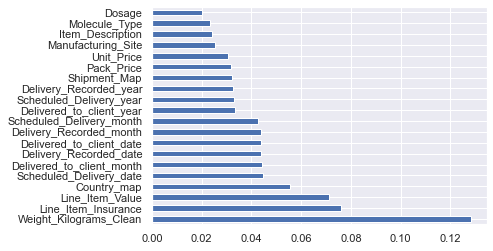

In [72]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()


Correlation

In [140]:
X.corr()

Managed_By  Unit_of_Measure_Per_Pack  \
Managed_By                    1.000000                  0.009668   
Unit_of_Measure_Per_Pack      0.009668                  1.000000   
Line_Item_Value              -0.007010                 -0.129358   
Pack_Price                    0.029443                  0.227288   
Unit_Price                    0.028622                 -0.207386   
Line_Item_Insurance          -0.006565                 -0.131199   
Country_map                  -0.001440                  0.000872   
Shipment_Map                 -0.008434                 -0.104093   
Fulfill_via_map               0.013983                  0.031171   
Scheduled_Delivery_month     -0.013074                  0.003530   
Delivered_to_client_month    -0.012895                 -0.004571   
Delivery_Recorded_month      -0.013043                 -0.011519   
First_Line_Designation_map    0.007627                  0.046600   
Weight_Kilograms_Clean       -0.011052                 -0.116317   
Vendor_INCO_Term              0.014761                  0.035460   
Product_Group                 0.027370                 -0.078239   
Sub_Classification            0.000595                  0.486225   
Vendor                        0.002299                 -0.179507   
Item_Description             -0.004145                  0.180296   
Molecule_Type                -0.003666                  0.225345   
Brand                         0.022099                 -0.131759   
Dosage                        0.006299                 -0.386744   
Dosage_Form                   0.017190                 -0.215797   
Manufacturing_Site            0.015515                 -0.367056   

                            Line_Item_Value  Pack_Price  Unit_Price  \
Managed_By                        -0.007010    0.029443    0.028622   
Unit_of_Measure_Per_Pack          -0.129358    0.227288   -0.207386   
Line_Item_Value                    1.000000    0.102857    0.085510   
Pack_Price                         0.102857    1.000000    0.810669   
Unit_Price                         0.085510    0.810669    1.000000   
Line_Item_Insurance                0.978592    0.094152    0.077003   
Country_map                       -0.186055    0.172933    0.218383   
Shipment_Map                       0.325039   -0.310671   -0.281678   
Fulfill_via_map                   -0.027123    0.493886    0.494164   
Scheduled_Delivery_month           0.023980   -0.000956    0.002724   
Delivered_to_client_month          0.030675    0.008720    0.014109   
Delivery_Recorded_month            0.039006    0.004328    0.010892   
First_Line_Designation_map         0.105339    0.222935    0.189865   
Weight_Kilograms_Clean             0.612288   -0.281573   -0.253369   
Vendor_INCO_Term                  -0.048992    0.513412    0.508120   
Product_Group                      0.010065    0.678842    0.827263   
Sub_Classification                -0.307456   -0.051030   -0.126225   
Vendor                             0.051888   -0.071253    0.087345   
Item_Description                  -0.061036   -0.234283   -0.334303   
Molecule_Type                     -0.089133   -0.248816   -0.367337   
Brand                             -0.183920    0.167072    0.337977   
Dosage                             0.067716    0.222569    0.339167   
Dosage_Form                        0.227583    0.434743    0.578616   
Manufacturing_Site                 0.006228   -0.036107    0.162814   

                            Line_Item_Insurance  Country_map  Shipment_Map  \
Managed_By                            -0.006565    -0.001440     -0.008434   
Unit_of_Measure_Per_Pack              -0.131199     0.000872     -0.104093   
Line_Item_Value                        0.978592    -0.186055      0.325039   
Pack_Price                             0.094152     0.172933     -0.310671   
Unit_Price                             0.077003     0.218383     -0.281678   
Line_Item_Insurance                    1.000000    -0.202044      0.323363   
Count

<AxesSubplot:>

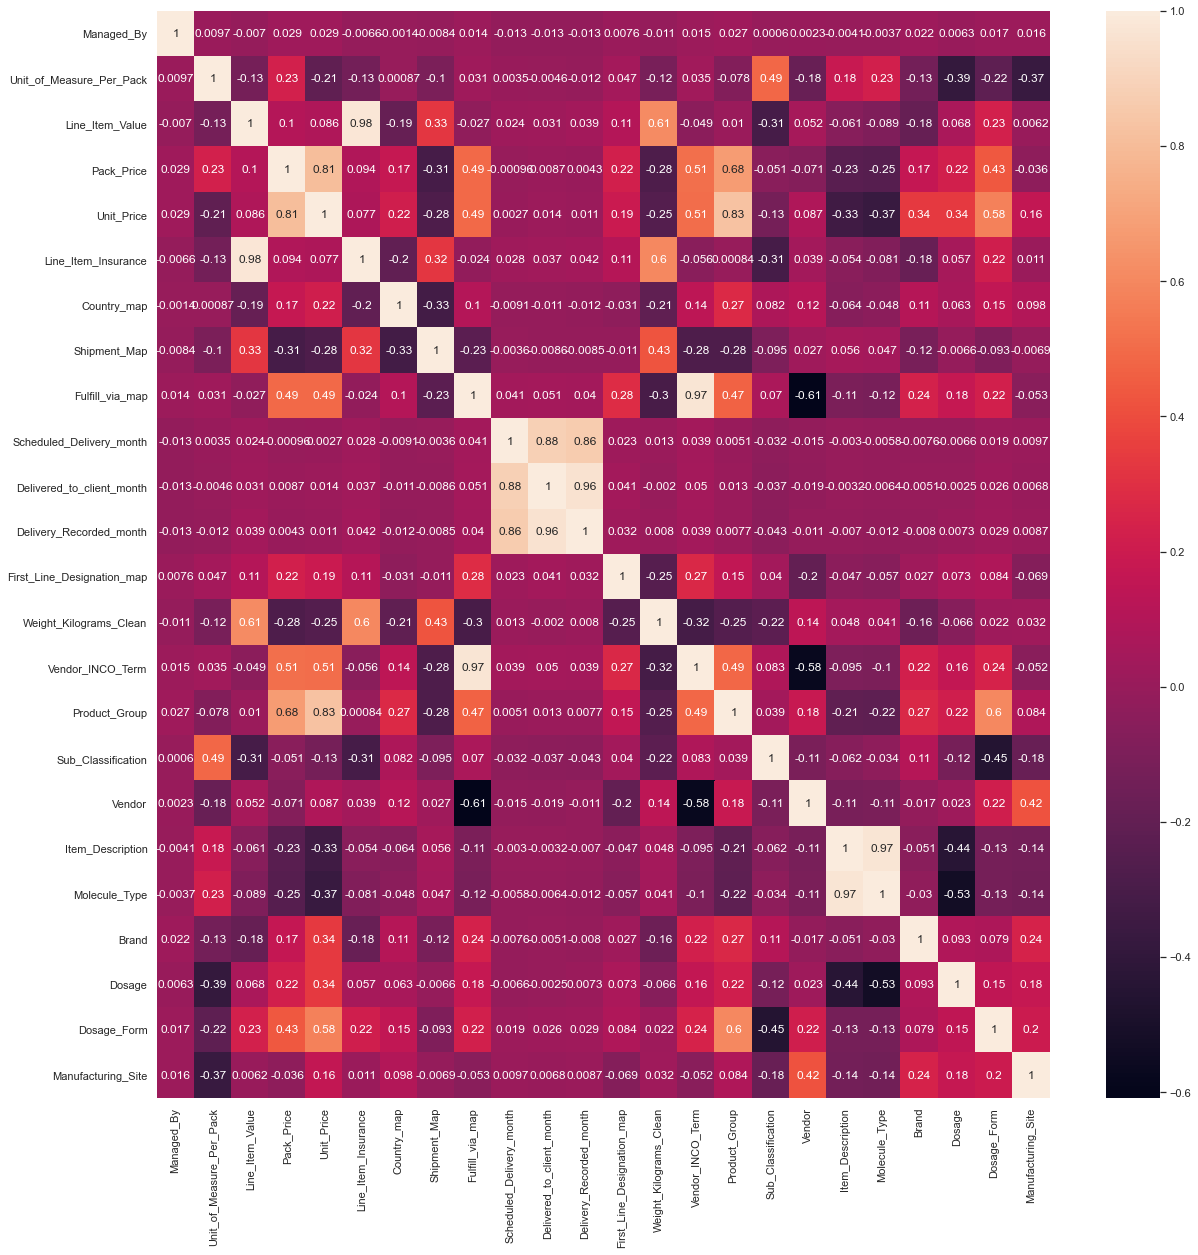

In [73]:
corr=X.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(combineddata_final[top_features].corr(),annot=True)

As the feature "Line_item_quantity" and "Line_item_value" denotes the same we removed either of the feature

In [75]:
threshold=0.95

In [76]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [77]:
correlation(X,threshold)

{'Delivery_Recorded_month',
 'Line_Item_Insurance',
 'Molecule_Type',
 'Vendor_INCO_Term'}

We can clearly see that the above features are highly correlated and we will try to remove one of them

###### Feature Scaling

In [70]:
#Standard Scaler
#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler=MinMaxScaler()

In [71]:
#combineddata_final=standard_scaler.fit_transform(combineddata_final)

#### Data Modeling

In [78]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=355)

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4417, 30)
(1893, 30)
(4417,)
(1893,)


######  1) Linear Regression

In [80]:
lin_reg=LinearRegression()

In [81]:
lin_reg_model=lin_reg.fit(x_train,y_train)

In [82]:
train_score=lin_reg_model.score(x_train,y_train)
test_score=lin_reg_model.score(x_test,y_test)

In [83]:
print("For the linear regression model the train score is: {} % and the test score is: {} %".format(train_score*100,test_score*100) )

For the linear regression model the train score is: 44.92115404610564 % and the test score is: 42.5053843733683 %


In [84]:
lin_reg_predict=lin_reg_model.predict(x_test)

In [85]:
print("MSE : {}".format(mean_squared_error(y_test,lin_reg_predict)))
print("RMSE : {}".format(np.sqrt(mean_squared_error(y_test,lin_reg_predict))))

MSE : 0.920320032363069
RMSE : 0.9593331185584437


 We can see that our model is not performing well in linear regression so lets use Ridge and lasso to find the features which impact our target variable

###### Ridge Regression

In [86]:
ridge=Ridge()

In [87]:
parameters={'alpha':range(1,50,1)}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': range(1, 50)})

In [88]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
0.4018760665647811


###### Lasso Regression

In [89]:
lasso=Lasso()
parameters={'alpha':range(1,50,1)}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)
lasso_model=lasso_regressor.fit(x_train,y_train)

In [90]:
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 1}
0.36533087826958804


In [91]:
np.array(lin_reg_model.coef_)

array([ 2.24071329e-01,  2.12558423e-03,  2.71879404e-06, -4.80842893e-03,
       -6.10422503e-01, -6.77659674e-04, -2.56233405e-02, -2.31288196e-02,
       -1.23704411e+00,  5.29080781e-04, -5.94780574e-02, -7.65135222e-01,
        7.09408945e-04,  1.25867348e-01,  1.73224335e+00,  5.32088635e-04,
       -6.96509165e-02, -9.90639187e-01, -1.98111026e-01,  1.38619938e-04,
        2.74076222e-01,  5.64990122e-01, -1.76415658e-02,  1.63160149e-02,
        1.03492598e-02, -1.62655444e-02, -1.72840022e-02,  2.41499302e-03,
        1.88295977e-02, -2.26785394e-03])

###### Decision Tree

In [92]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image

In [93]:
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X,y)

DecisionTreeRegressor()

In [94]:
decision_tree.score(x_test,y_test)

0.9992574594015046

###### Tree Building

In [95]:
dot_data=export_graphviz(desicion_tree,feature_names=features_names,filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

NameError: name 'desicion_tree' is not defined

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.350945 to fit



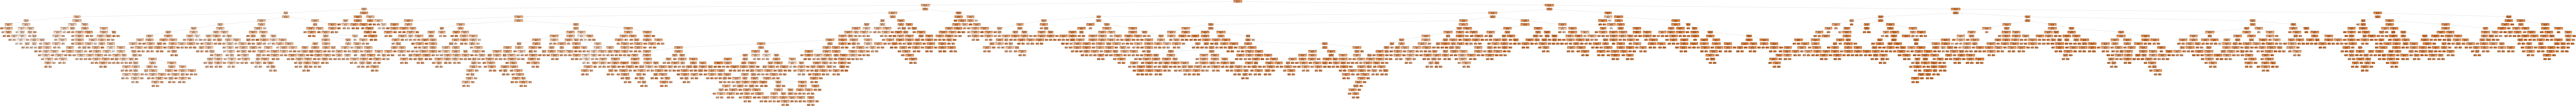

In [238]:
Image(graph.create_png())

In [96]:
# HyperParameter Tuning
grid_param={
    'criterion':['mse'],
    'max_depth':range(1,20,1),
    'min_samples_leaf':range(3,20,1),
    'splitter':['best','random']
}

In [97]:
grid_search=GridSearchCV(estimator=decision_tree,param_grid=grid_param,cv=5,n_jobs=-2)

In [98]:
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-2,
             param_grid={'criterion': ['mse'], 'max_depth': range(1, 20),
                         'min_samples_leaf': range(3, 20),
                         'splitter': ['best', 'random']})

In [99]:
print(grid_search.best_params_)

{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 12, 'splitter': 'best'}


In [100]:
new_model=DecisionTreeRegressor(criterion='mse',max_depth=10,min_samples_leaf=12,splitter='best')

In [101]:
new_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=12)

In [102]:
new_model.score(x_test,y_test)

0.6444395221982584

##### Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
random_forest=RandomForestRegressor(random_state=6)

In [105]:
random_forest_model=random_forest.fit(x_train,y_train)

In [106]:
random_forest_model.score(x_test,y_test)

0.7445076209238064

In [107]:
#Hyper parameter Tuning
grid_param={
    'criterion':['mse'],
    'max_depth':range(1,10,1),
    'min_samples_leaf':range(3,10,1),
    
}

In [108]:
grid_search=GridSearchCV(estimator=random_forest_model,param_grid=grid_param,
cv=3,n_jobs=2)

In [109]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=6), n_jobs=2,
             param_grid={'criterion': ['mse'], 'max_depth': range(1, 10),
                         'min_samples_leaf': range(3, 10)})

In [110]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 3}
0.7033533680766283


In [111]:
rand_new_model=RandomForestRegressor(criterion='mse',max_depth=9,min_samples_leaf=4)

In [112]:
rand_new_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=4)

In [113]:
rand_new_model.score(x_test,y_test)

0.7041854173291482

##### Exporting to an pickle file

In [122]:
import pickle
file=open('Model.pkl','wb')
pickle.dump(random_forest_model,file)

In [124]:
final_model=open('Model.pkl','rb')
forest=pickle.load(final_model)

In [126]:
y_prediction=forest.predict(x_test)

In [127]:
y_prediction

array([6.17, 9.95, 9.03, ..., 9.95, 8.76, 9.54])

In [129]:
from sklearn import metrics

In [130]:
metrics.r2_score(y_test,y_prediction)

0.7445076209238064

In [131]:
combineddata_final.columns

Index(['Managed_By', 'Unit_of_Measure_Per_Pack', 'Line_Item_Value',
       'Pack_Price', 'Unit_Price', 'Line_Item_Insurance', 'Country_map',
       'Shipment_Map', 'Fulfill_via_map', 'Scheduled_Delivery_date',
       'Scheduled_Delivery_month', 'Scheduled_Delivery_year',
       'Delivered_to_client_date', 'Delivered_to_client_month',
       'Delivered_to_client_year', 'Delivery_Recorded_date',
       'Delivery_Recorded_month', 'Delivery_Recorded_year',
       'First_Line_Designation_map', 'Freight_Cost_USD_Clean',
       'Weight_Kilograms_Clean', 'Vendor_INCO_Term', 'Product_Group',
       'Sub_Classification', 'Vendor', 'Item_Description', 'Molecule_Type',
       'Brand', 'Dosage', 'Dosage_Form', 'Manufacturing_Site'],
      dtype='object')

In [134]:
data.Country.unique()

array(["Côte d'Ivoire", 'Vietnam', 'Nigeria', 'Zambia', 'Tanzania',
       'Rwanda', 'Haiti', 'Zimbabwe', 'Ethiopia', 'South Africa',
       'Guyana', 'Namibia', 'Botswana', 'Mozambique', 'Kenya',
       'Kazakhstan', 'Uganda', 'Kyrgyzstan', 'Senegal', 'Benin',
       'Lesotho', 'Pakistan', 'Swaziland', 'Ghana', 'Angola', 'Lebanon',
       'Sierra Leone', 'Cameroon', 'South Sudan', 'Burundi',
       'Dominican Republic', 'Malawi', 'Congo, DRC', 'Sudan', 'Mali',
       'Guatemala', 'Togo', 'Afghanistan', 'Liberia', 'Burkina Faso',
       'Guinea', 'Libya', 'Belize'], dtype=object)